<a href="https://colab.research.google.com/github/neuralresearch/CS39-6/blob/main/TaGSim_Graph_Pooling_(LINUX).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import ast
print(sys.executable)
import os
import random
import networkx as nx
from matplotlib import pyplot as plt
import pylab
import re
import torch
import numpy as np
import pandas as pd
# 1.nr 2.nid 3.er 4.eid

/usr/bin/python3


In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#get the data from the drive https://drive.google.com/file/d/1YiX2r2glQ4r1hiy7BqAkSRyGvuPqBcne/view?usp=share_link
id = '1YiX2r2glQ4r1hiy7BqAkSRyGvuPqBcne'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('LINUX.zip')
!ls



LINUX.zip  sample_data


In [ ]:

!unzip /content/LINUX.zip

Archive:  /content/LINUX.zip
  inflating: generated/00000_NR_0_NID_7_ER_0_EID_1.gexf  
  inflating: generated/00001_NR_0_NID_4_ER_0_EID_4.gexf  
  inflating: generated/00002_NR_0_NID_1_ER_0_EID_7.gexf  
  inflating: generated/00003_NR_0_NID_1_ER_0_EID_7.gexf  
  inflating: generated/00004_NR_0_NID_1_ER_0_EID_7.gexf  
  inflating: generated/00005_NR_0_NID_4_ER_0_EID_4.gexf  
  inflating: generated/00006_NR_0_NID_4_ER_0_EID_4.gexf  
  inflating: generated/00007_NR_0_NID_6_ER_0_EID_2.gexf  
  inflating: generated/00008_NR_0_NID_3_ER_0_EID_5.gexf  
  inflating: generated/00009_NR_0_NID_2_ER_0_EID_6.gexf  
  inflating: generated/00011_NR_0_NID_3_ER_0_EID_5.gexf  
  inflating: generated/00012_NR_0_NID_5_ER_0_EID_3.gexf  
  inflating: generated/00013_NR_0_NID_5_ER_0_EID_3.gexf  
  inflating: generated/00014_NR_0_NID_1_ER_0_EID_7.gexf  
  inflating: generated/00015_NR_0_NID_1_ER_0_EID_7.gexf  
  inflating: generated/00016_NR_0_NID_5_ER_0_EID_3.gexf  
  inflating: generated/00017_NR_0_NID_2_ER_

In [ ]:
DATASET = "LINUX"
ORI_DIR = "/content/original"
GEN_DIR ="/content/generated"
TEST_DIR = "/content/test"
TEST_GEN_DIR = "/content/test"
DATASET_FOLDER = "/content"

In [ ]:
# test_csv = pd.DataFrame(test_data, columns=['G1', 'G2', 'gt_ged']).to_csv(DATASET_FOLDER + "/testing_pairs.csv",
#                                                                           index=False)
def load_pairs():
    train_pairs = []
    train_csv = pd.read_csv(DATASET_FOLDER+"/training_pairs.csv")
    for index, row in train_csv.iterrows():
        file1 = row['G1']
        file2 = row['G2']
        ged =ast.literal_eval(row['GED'])
        new_ged = [ged[1],ged[3]]
        gt_ged = row['gt_ged']
        graph1 = nx.read_gexf(path=ORI_DIR + '/' + file1)
        graph2 = nx.read_gexf(path=GEN_DIR + '/' + file2)
        train_pairs.append({"graph_pair": [graph1, graph2], "ged": new_ged, "gt_ged":gt_ged})


    test_pairs = []
    test_csv = pd.read_csv(DATASET_FOLDER+"/testing_pairs.csv")
    for index, row in test_csv.iterrows():
        file1 = row['G2']
        file2 = row['G1']
        gt_ged = row['gt_ged']
        graph1 = nx.read_gexf(path=TEST_GEN_DIR + '/' + file1)
        graph2 = nx.read_gexf(path=TEST_DIR + '/' + file2)
        test_pairs.append({"graph_pair": [graph1, graph2], "gt_ged": gt_ged})
    return train_pairs, test_pairs
train_pairs, test_pairs = load_pairs()
print(len(train_pairs))
print(train_pairs[0])
print(len(test_pairs))
print(test_pairs[0])

2001
{'graph_pair': [<networkx.classes.graph.Graph object at 0x7f02dd46f250>, <networkx.classes.graph.Graph object at 0x7f02dd496ed0>], 'ged': [7, 1], 'gt_ged': 8}
70
{'graph_pair': [<networkx.classes.graph.Graph object at 0x7f02d4303c50>, <networkx.classes.graph.Graph object at 0x7f02d4313f90>], 'gt_ged': 11.0}


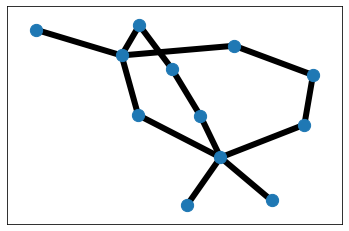

In [ ]:

train_csv = pd.read_csv(DATASET_FOLDER+"/training_pairs.csv")
row=train_csv.iloc[9]
file1 = row['G1']
file2 = row['G2']
graph1 = nx.read_gexf(path=ORI_DIR + '/' + file1)
graph2 = nx.read_gexf(path=GEN_DIR + '/' + file2)
draw_graph(graph1)

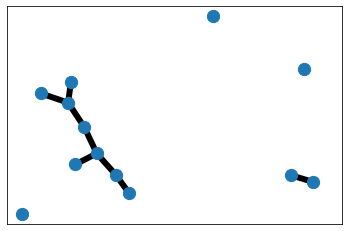

In [ ]:
draw_graph(graph2)

In [ ]:
row

G1                              00816.gexf
G2        00816_NR_0_NID_1_ER_0_EID_7.gexf
GED                           [0, 1, 0, 7]
gt_ged                                   8
Name: 9, dtype: object

In [ ]:

def draw_graph(G):
  pos=nx.spring_layout(G ,seed=42,scale=2)
  edgelist=G.edges
  edge_labels = nx.get_edge_attributes(G, "valence")
  node_labels = nx.get_node_attributes(G, "type")

  nx.draw_networkx_nodes(G, pos, node_size=150)
  nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=6)
  nx.draw_networkx_labels(G, pos,labels=node_labels, font_size=20, font_family="sans-serif")
  nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [ ]:

epochs = 10
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
def fit(model,title):
  optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
  iteration = 0

  visual_loss_train = []
  visual_loss_test = []
  train_pair = []
  test_pair = []
  epo = []
  #model training
  for epoch in range(epochs):
    
      random.shuffle(train_pairs)
      batches = []
      for graph in range(0, len(train_pairs), batch_size):
          batches.append(train_pairs[graph:graph + batch_size])

      for batch in batches:
          model.train()
          optimizer.zero_grad()
          losses = 0
          for graph_pair in batch:
              data = model.transform_label_multiset(graph_pair)
              prediction = model(data)
              losses += torch.nn.functional.mse_loss(data["target"], prediction)

          losses.backward(retain_graph=True)
          optimizer.step()
          loss = losses.item()
          #print('Iteration', iteration, 'loss: ', loss / len(batch))
          iteration += 1

      visual_loss_train.append(loss / len(batch))


      # testing
      model.eval()
      test_scores=[]
      for n in test_pairs:
          graph1 = n['graph_pair'][0]  #updated_test
          graph2 = n['graph_pair'][1]  #updated_test
          ged = int(n['gt_ged'])
          tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
          data = model.transform_label_multiset(tem_data, type_specified=False)
          prediction = model(data)
          prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
          current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
          test_scores.append(current_error.data.item())
      visual_loss_test.append(sum(test_scores) / len(test_scores))
      epo.append(epoch + 1)


  #visualization of traning and testing loss
  plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
  plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  print("\n-------Model testing---------.\n")

  model.eval()
  test_scores = []
  for n in test_pairs:
      graph1 = n['graph_pair'][0]  #updated_test
      graph2 = n['graph_pair'][1]  #updated_test
      ged = int(n['gt_ged'])
      tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
      data = model.transform_label_multiset(tem_data, type_specified=False)
      prediction = model(data)
      prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
      prediction = torch.sum(prediction).view(1, -1)
      current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
      test_scores.append(current_error.data.item())

  model_error = sum(test_scores) / len(test_scores)
  print("\nModel test error: " + str(model_error))
  model.testResult=visual_loss_test

#MAX

In [ ]:


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim_max(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim_max, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.testResult=[]
        self.setup_layers()



    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 7)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 23)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']

        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        #label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0  ])
        for i in graph2.nodes():
            node_features_2.append([1.0  ])
            

        for i in edges1:
            edge_features_1.append([1.0 ])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0  ])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))


        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        node_features_1,node_features_2=        nx.adjacency_matrix(graph1).todense(), nx.adjacency_matrix(graph2).todense()
        #label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_adj_1"], label_multiset["node_adj_2"] =torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))
        
        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset
    def forward(self, label_multiset):
      adj_1 =  label_multiset["edge_adj_1"]
      adj_2 =  label_multiset["edge_adj_2"] 
      adj_1 =  label_multiset["node_adj_1"]
      adj_2 =  label_multiset["node_adj_2"] 
      features_1, features_2 = label_multiset["features_1"],label_multiset["features_2"]
      edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
      
      edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

              
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if(graph1_hidden1[i][0] >= 6):# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*5 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(6)])

        if(graph1_hidden2[i][0] >= 15):# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*14 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(15)])

      for i in range(graph2_hidden1.size()[0]):
          if(graph2_hidden1[i][0] >= 6):# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*5 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(6)])

          if(graph2_hidden2[i][0] >= 15):# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*14 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(15)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))


      edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
      edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge


      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)

      graph1_01pooled = torch.max(graph1_01concat, dim=0).values.unsqueeze(1)

      graph2_01pooled = torch.max(graph2_01concat, dim=0).values.unsqueeze(1)
      graph1_12pooled = torch.max(graph1_12concat,  dim=0).values
      graph2_12pooled = torch.max(graph2_12concat, dim=0).values



      scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      scores_in = torch.t(scores_in)

      scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      score_in = torch.sigmoid(self.scoring_layer_in(scores_in))
        #edge level embedding Concatenation
      edge1_01concat = torch.cat([ edge_features_1, edge1_hidden1], dim=1)
      edge2_01concat = torch.cat([ edge_features_2, edge2_hidden1], dim=1)
      #graph pooling: edge Sum
      edge1_01pooled = torch.max(edge1_01concat, dim=0).values
      edge2_01pooled = torch.max(edge2_01concat, dim=0).values

      graph1_ec_input=torch.cat([ graph1_12pooled, edge1_01pooled]).unsqueeze(1)
      graph2_ec_input=torch.cat([ graph2_12pooled, edge2_01pooled]).unsqueeze(1)
      scores_ec = self.tensor_network_ec(graph1_ec_input, graph2_ec_input)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))
                     #edge insert
      return torch.cat([score_in, score_ec], dim=1)



-------Model training---------.

Iteration 0 loss:  0.18741483986377716
Iteration 1 loss:  0.18116700649261475
Iteration 2 loss:  0.17737093567848206
Iteration 3 loss:  0.17774109542369843
Iteration 4 loss:  0.15458577871322632
Iteration 5 loss:  0.15743181109428406
Iteration 6 loss:  0.16422949731349945
Iteration 7 loss:  0.1661110669374466
Iteration 8 loss:  0.14914570748806
Iteration 9 loss:  0.15664394199848175
Iteration 10 loss:  0.16061916947364807
Iteration 11 loss:  0.14878782629966736
Iteration 12 loss:  0.1519729495048523
Iteration 13 loss:  0.14033949375152588
Iteration 14 loss:  0.13923533260822296
Iteration 15 loss:  0.1292353618292161
Iteration 16 loss:  0.13244274258613586
Iteration 17 loss:  0.12971992790699005
Iteration 18 loss:  0.13046179711818695
Iteration 19 loss:  0.12927159667015076
Iteration 20 loss:  0.12415234744548798
Iteration 21 loss:  0.11417471617460251
Iteration 22 loss:  0.11417495459318161
Iteration 23 loss:  0.12091439962387085
Iteration 24 loss:  0.

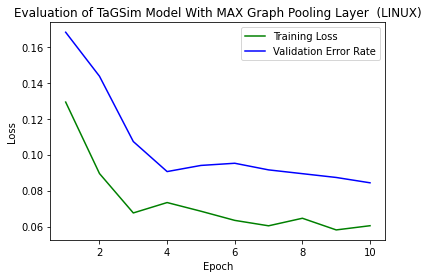


-------Model testing---------.


Model test error: 0.3654850609667067


In [ ]:

import matplotlib.pyplot as plt

epochs = 10
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim_max(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []
#model training
for epoch in range(epochs):
  
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))


    # testing
    model.eval()
    test_scores=[]
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)


#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
plt.title('Evaluation of TaGSim Model With MAX Graph Pooling Layer  (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    #prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    prediction = torch.sum(prediction).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

In [ ]:


#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
plt.title('Evaluation of TaGSim Model with MAX Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

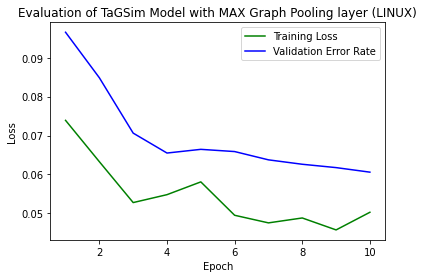


-------Model testing---------.


Model test error: 0.060595127828439996


In [ ]:

model_max = TaGSim_max(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Model with MAX Graph Pooling layer (' + DATASET + ')'
fit(model_max,title)

#Mean


In [ ]:


class TaGSim_mean(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim_mean, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.testResult=[]
        self.setup_layers()



    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 7)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 23)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']

        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        #label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0  ])
        for i in graph2.nodes():
            node_features_2.append([1.0  ])
            

        for i in edges1:
            edge_features_1.append([1.0 ])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0  ])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))


        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        node_features_1,node_features_2=        nx.adjacency_matrix(graph1).todense(), nx.adjacency_matrix(graph2).todense()
        #label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_adj_1"], label_multiset["node_adj_2"] =torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))
        
        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset
    def forward(self, label_multiset):
      adj_1 =  label_multiset["edge_adj_1"]
      adj_2 =  label_multiset["edge_adj_2"] 
      adj_1 =  label_multiset["node_adj_1"]
      adj_2 =  label_multiset["node_adj_2"] 
      features_1, features_2 = label_multiset["features_1"],label_multiset["features_2"]
      edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
      
      edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

              
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if(graph1_hidden1[i][0] >= 6):# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*5 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(6)])

        if(graph1_hidden2[i][0] >= 15):# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*14 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(15)])

      for i in range(graph2_hidden1.size()[0]):
          if(graph2_hidden1[i][0] >= 6):# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*5 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(6)])

          if(graph2_hidden2[i][0] >= 15):# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*14 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(15)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))


      edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
      edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge


      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)
      graph1_01pooled = torch.mean(graph1_01concat, dim=0).unsqueeze(1) 
      graph2_01pooled = torch.mean(graph2_01concat, dim=0).unsqueeze(1)
      graph1_12pooled = torch.mean(graph1_12concat,  dim=0)
      graph2_12pooled = torch.mean(graph2_12concat, dim=0)



      scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      scores_in = torch.t(scores_in)

      scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      score_in = torch.sigmoid(self.scoring_layer_in(scores_in))
        #edge level embedding Concatenation
      edge1_01concat = torch.cat([ edge_features_1, edge1_hidden1], dim=1)
      edge2_01concat = torch.cat([ edge_features_2, edge2_hidden1], dim=1)
      #graph pooling: edge Sum
      edge1_01pooled = torch.mean(edge1_01concat, dim=0)
      edge2_01pooled = torch.mean(edge2_01concat, dim=0)

      graph1_ec_input=torch.cat([ graph1_12pooled, edge1_01pooled]).unsqueeze(1)
      graph2_ec_input=torch.cat([ graph2_12pooled, edge2_01pooled]).unsqueeze(1)
      scores_ec = self.tensor_network_ec(graph1_ec_input, graph2_ec_input)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))
                     #edge insert
      return torch.cat([score_in, score_ec], dim=1)



-------Model training---------.

Iteration 0 loss:  0.1280885636806488
Iteration 1 loss:  0.13028603792190552
Iteration 2 loss:  0.12346915900707245
Iteration 3 loss:  0.1263076514005661
Iteration 4 loss:  0.12166304141283035
Iteration 5 loss:  0.12406255304813385
Iteration 6 loss:  0.12139859050512314
Iteration 7 loss:  0.12452176213264465
Iteration 8 loss:  0.12779220938682556
Iteration 9 loss:  0.12254711985588074
Iteration 10 loss:  0.12547490000724792
Iteration 11 loss:  0.1151147335767746
Iteration 12 loss:  0.11991031467914581
Iteration 13 loss:  0.10671505331993103
Iteration 14 loss:  0.11081666499376297
Iteration 15 loss:  0.10972970797691817
Iteration 16 loss:  0.10952020436525345
Iteration 17 loss:  0.10915633291006088
Iteration 18 loss:  0.11682908982038498
Iteration 19 loss:  0.12297962605953217
Iteration 20 loss:  0.1166866272687912
Iteration 21 loss:  0.10310972481966019
Iteration 22 loss:  0.10998811572790146
Iteration 23 loss:  0.10727275907993317
Iteration 24 loss:  

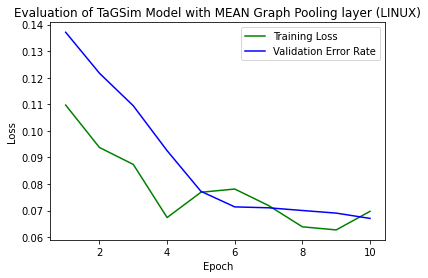


-------Model testing---------.


Model test error: 0.4663929381008659


In [ ]:

import matplotlib.pyplot as plt

epochs = 10
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim_mean(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []
#model training
for epoch in range(epochs):
  
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))


    # testing
    model.eval()
    test_scores=[]
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)


#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
plt.title('Evaluation of TaGSim Model with MEAN Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    #prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    prediction = torch.sum(prediction).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

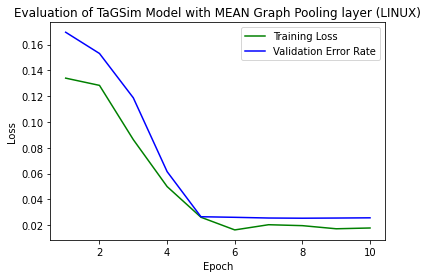


-------Model testing---------.


Model test error: 0.025679245832264185


In [ ]:

model = TaGSim_mean(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Model with MEAN Graph Pooling layer (' + DATASET + ')'
fit(model,title)

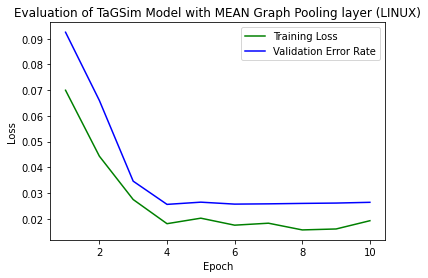


-------Model testing---------.


Model test error: 0.02637176484014552


In [ ]:

model = TaGSim_mean(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Model with MEAN Graph Pooling layer (' + DATASET + ')'
fit(model,title)

#MIN

In [ ]:


class TaGSim_min(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim_min, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.testResult=[]
        self.setup_layers()



    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 7)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 23)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']

        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        #label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0  ])
        for i in graph2.nodes():
            node_features_2.append([1.0  ])
            

        for i in edges1:
            edge_features_1.append([1.0 ])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0  ])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))


        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        node_features_1,node_features_2=        nx.adjacency_matrix(graph1).todense(), nx.adjacency_matrix(graph2).todense()
        #label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_adj_1"], label_multiset["node_adj_2"] =torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))
        
        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset
    def forward(self, label_multiset):
      adj_1 =  label_multiset["edge_adj_1"]
      adj_2 =  label_multiset["edge_adj_2"] 
      adj_1 =  label_multiset["node_adj_1"]
      adj_2 =  label_multiset["node_adj_2"] 
      features_1, features_2 = label_multiset["features_1"],label_multiset["features_2"]
      edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
      
      edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

              
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if(graph1_hidden1[i][0] >= 6):# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*5 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(6)])

        if(graph1_hidden2[i][0] >= 15):# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*14 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(15)])

      for i in range(graph2_hidden1.size()[0]):
          if(graph2_hidden1[i][0] >= 6):# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*5 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(6)])

          if(graph2_hidden2[i][0] >= 15):# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*14 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(15)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))


      edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
      edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge


      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)

      graph1_01pooled = torch.min(graph1_01concat, dim=0).values.unsqueeze(1)

      graph2_01pooled = torch.min(graph2_01concat, dim=0).values.unsqueeze(1)
      graph1_12pooled = torch.min(graph1_12concat,  dim=0).values
      graph2_12pooled = torch.min(graph2_12concat, dim=0).values



      scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      scores_in = torch.t(scores_in)

      scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      score_in = torch.sigmoid(self.scoring_layer_in(scores_in))
        #edge level embedding Concatenation
      edge1_01concat = torch.cat([ edge_features_1, edge1_hidden1], dim=1)
      edge2_01concat = torch.cat([ edge_features_2, edge2_hidden1], dim=1)
      #graph pooling: edge Sum
      edge1_01pooled = torch.min(edge1_01concat, dim=0).values
      edge2_01pooled = torch.min(edge2_01concat, dim=0).values

      graph1_ec_input=torch.cat([ graph1_12pooled, edge1_01pooled]).unsqueeze(1)
      graph2_ec_input=torch.cat([ graph2_12pooled, edge2_01pooled]).unsqueeze(1)
      scores_ec = self.tensor_network_ec(graph1_ec_input, graph2_ec_input)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))
                     #edge insert
      return torch.cat([score_in, score_ec], dim=1)


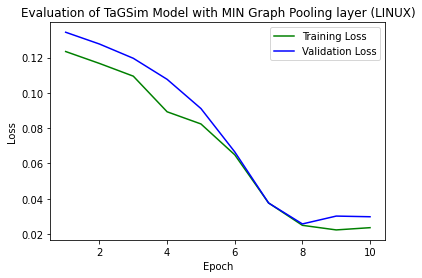


-------Model testing---------.


Model test error: 0.029752426140450032


In [ ]:

model = TaGSim_min(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Model with MIN Graph Pooling layer (' + DATASET + ')'
fit(model,title)

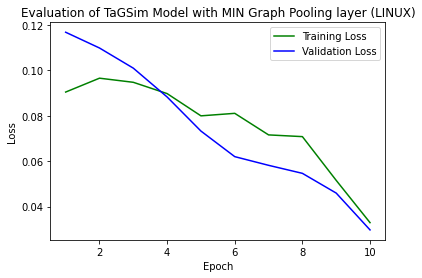


-------Model testing---------.


Model test error: 0.029760801000260732


In [ ]:

model_min = TaGSim_min(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Model with MIN Graph Pooling layer (' + DATASET + ')'
fit(model_min,title)

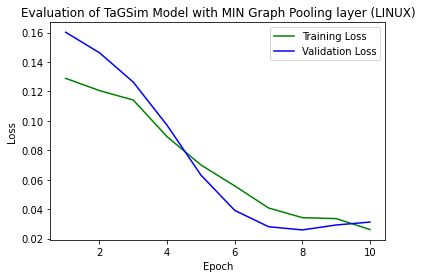


-------Model testing---------.


Model test error: 0.03123476058639686


In [ ]:

model_min = TaGSim_min(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Model with MIN Graph Pooling layer (' + DATASET + ')'
fit(model_min,title)


-------Model training---------.

Iteration 0 loss:  0.15980687737464905
Iteration 1 loss:  0.15998496115207672
Iteration 2 loss:  0.15487737953662872
Iteration 3 loss:  0.14784619212150574
Iteration 4 loss:  0.1399659961462021
Iteration 5 loss:  0.15961608290672302
Iteration 6 loss:  0.15883229672908783
Iteration 7 loss:  0.15978004038333893
Iteration 8 loss:  0.14787925779819489
Iteration 9 loss:  0.13558343052864075
Iteration 10 loss:  0.1588415652513504
Iteration 11 loss:  0.14973902702331543
Iteration 12 loss:  0.14969493448734283
Iteration 13 loss:  0.14252500236034393
Iteration 14 loss:  0.13572461903095245
Iteration 15 loss:  0.1394375341909903
Iteration 16 loss:  0.1492612510919571
Iteration 17 loss:  0.15430289506912231
Iteration 18 loss:  0.1457889825105667
Iteration 19 loss:  0.14754582941532135
Iteration 20 loss:  0.14333175122737885
Iteration 21 loss:  0.14658090472221375
Iteration 22 loss:  0.1322086900472641
Iteration 23 loss:  0.1416110247373581
Iteration 24 loss:  0.1

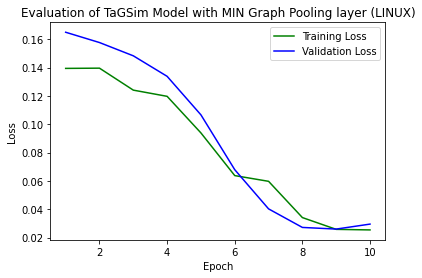


-------Model testing---------.


Model test error: 1.0758048934595925


In [ ]:

import matplotlib.pyplot as plt

epochs = 10
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim_min(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []
#model training
for epoch in range(epochs):
  
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))


    # testing
    model.eval()
    test_scores=[]
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)


#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
plt.title('Evaluation of TaGSim Model with MIN Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    #prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    prediction = torch.sum(prediction).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

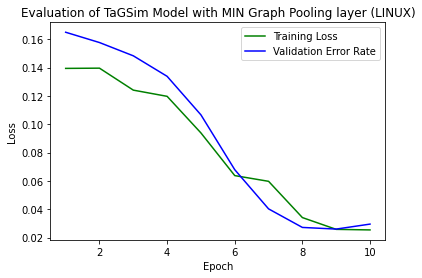

In [ ]:


#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
plt.title('Evaluation of TaGSim Model with MIN Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

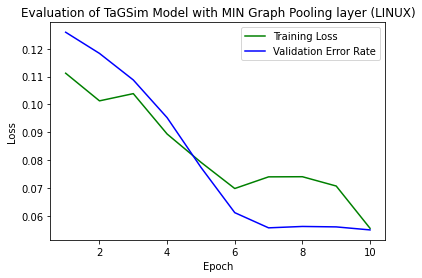


-------Model testing---------.


Model test error: 0.05489506461685778


In [ ]:

model = TaGSim_min(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Model with MIN Graph Pooling layer (' + DATASET + ')'
fit(model,title)

# Base model

In [ ]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()



    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 7)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 23)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']

        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        #label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0  ])
        for i in graph2.nodes():
            node_features_2.append([1.0  ])
            

        for i in edges1:
            edge_features_1.append([1.0 ])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0  ])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))


        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        node_features_1,node_features_2=        nx.adjacency_matrix(graph1).todense(), nx.adjacency_matrix(graph2).todense()
        #label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_adj_1"], label_multiset["node_adj_2"] =torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))
        
        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset
    def forward(self, label_multiset):
      adj_1 =  label_multiset["edge_adj_1"]
      adj_2 =  label_multiset["edge_adj_2"] 
      adj_1 =  label_multiset["node_adj_1"]
      adj_2 =  label_multiset["node_adj_2"] 
      features_1, features_2 = label_multiset["features_1"],label_multiset["features_2"]
      edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
      
      edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

              
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if(graph1_hidden1[i][0] >= 6):# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*5 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(6)])

        if(graph1_hidden2[i][0] >= 15):# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*14 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(15)])

      for i in range(graph2_hidden1.size()[0]):
          if(graph2_hidden1[i][0] >= 6):# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*5 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(6)])

          if(graph2_hidden2[i][0] >= 15):# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*14 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(15)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))


      edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
      edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge


      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)
        #edge level embedding Concatenation
      edge1_01concat = torch.cat([ edge_features_1, edge1_hidden1], dim=1)
      edge2_01concat = torch.cat([ edge_features_2, edge2_hidden1], dim=1)
      #graph pooling: edge Sum
      edge1_01pooled = torch.sum(edge1_01concat, dim=0)
      edge2_01pooled = torch.sum(edge2_01concat, dim=0)

      graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)# default: sum
      graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
      graph1_12pooled = torch.sum(graph1_12concat, dim=0)
      graph2_12pooled = torch.sum(graph2_12concat, dim=0)



      scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      scores_in = torch.t(scores_in)

      scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

      graph1_ec_input=torch.cat([ graph1_12pooled, edge1_01pooled]).unsqueeze(1)
      graph2_ec_input=torch.cat([ graph2_12pooled, edge2_01pooled]).unsqueeze(1)
      scores_ec = self.tensor_network_ec(graph1_ec_input, graph2_ec_input)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))
                     #edge insert
      return torch.cat([score_in, score_ec], dim=1)


In [ ]:

import matplotlib.pyplot as plt

epochs = 10
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
def fit(model,title):
  optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
  iteration = 0

  visual_loss_train = []
  visual_loss_test = []
  train_pair = []
  test_pair = []
  epo = []
  #model training
  for epoch in range(epochs):
    
      random.shuffle(train_pairs)
      batches = []
      for graph in range(0, len(train_pairs), batch_size):
          batches.append(train_pairs[graph:graph + batch_size])

      for batch in batches:
          model.train()
          optimizer.zero_grad()
          losses = 0
          for graph_pair in batch:
              data = model.transform_label_multiset(graph_pair)
              prediction = model(data)
              losses += torch.nn.functional.mse_loss(data["target"], prediction)

          losses.backward(retain_graph=True)
          optimizer.step()
          loss = losses.item()
          #print('Iteration', iteration, 'loss: ', loss / len(batch))
          iteration += 1

      visual_loss_train.append(loss / len(batch))


      # testing
      model.eval()
      test_scores=[]
      for n in test_pairs:
          graph1 = n['graph_pair'][0]  #updated_test
          graph2 = n['graph_pair'][1]  #updated_test
          ged = int(n['gt_ged'])
          tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
          data = model.transform_label_multiset(tem_data, type_specified=False)
          prediction = model(data)
          prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
          current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
          test_scores.append(current_error.data.item())
      visual_loss_test.append(sum(test_scores) / len(test_scores))
      epo.append(epoch + 1)


  #visualization of traning and testing loss
  plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
  plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  print("\n-------Model testing---------.\n")

  model.eval()
  test_scores = []
  for n in test_pairs:
      graph1 = n['graph_pair'][0]  #updated_test
      graph2 = n['graph_pair'][1]  #updated_test
      ged = int(n['gt_ged'])
      tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
      data = model.transform_label_multiset(tem_data, type_specified=False)
      prediction = model(data)
      prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
      prediction = torch.sum(prediction).view(1, -1)
      current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
      test_scores.append(current_error.data.item())

  model_error = sum(test_scores) / len(test_scores)
  print("\nModel test error: " + str(model_error))


-------Model training---------.



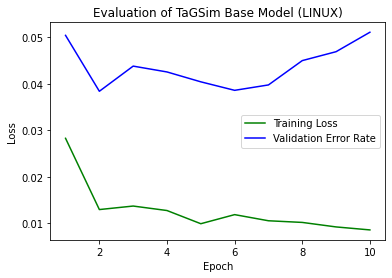


-------Model testing---------.


Model test error: 0.05111234154783233


In [ ]:

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)

def fit(model,title):
  optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
  iteration = 0

  visual_loss_train = []
  visual_loss_test = []
  train_pair = []
  test_pair = []
  epo = []
  #model training
  for epoch in range(epochs):
    
      random.shuffle(train_pairs)
      batches = []
      for graph in range(0, len(train_pairs), batch_size):
          batches.append(train_pairs[graph:graph + batch_size])

      for batch in batches:
          model.train()
          optimizer.zero_grad()
          losses = 0
          for graph_pair in batch:
              data = model.transform_label_multiset(graph_pair)
              prediction = model(data)
              losses += torch.nn.functional.mse_loss(data["target"], prediction)

          losses.backward(retain_graph=True)
          optimizer.step()
          loss = losses.item()
          #print('Iteration', iteration, 'loss: ', loss / len(batch))
          iteration += 1

      visual_loss_train.append(loss / len(batch))


      # testing
      model.eval()
      test_scores=[]
      for n in test_pairs:
          graph1 = n['graph_pair'][0]  #updated_test
          graph2 = n['graph_pair'][1]  #updated_test
          ged = int(n['gt_ged'])
          tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
          data = model.transform_label_multiset(tem_data, type_specified=False)
          prediction = model(data)
          prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
          current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
          test_scores.append(current_error.data.item())
      visual_loss_test.append(sum(test_scores) / len(test_scores))
      epo.append(epoch + 1)


  #visualization of traning and testing loss
  plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
  plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  print("\n-------Model testing---------.\n")

  model.eval()
  test_scores = []
  for n in test_pairs:
      graph1 = n['graph_pair'][0]  #updated_test
      graph2 = n['graph_pair'][1]  #updated_test
      ged = int(n['gt_ged'])
      tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
      data = model.transform_label_multiset(tem_data, type_specified=False)
      prediction = model(data)
      prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
      prediction = torch.sum(prediction).view(1, -1)
      current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
      test_scores.append(current_error.data.item())

  model_error = sum(test_scores) / len(test_scores)
  print("\nModel test error: " + str(model_error))
  model.testResult=visual_loss_test
model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Base Model (' + DATASET + ')'
fit(model,title)

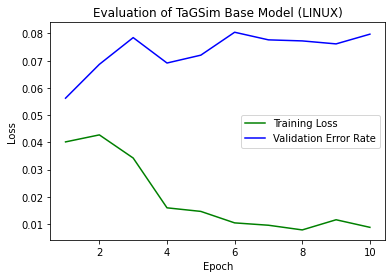


-------Model testing---------.


Model test error: 0.07973101170240884


In [ ]:

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Base Model (' + DATASET + ')'
fit(model,title)

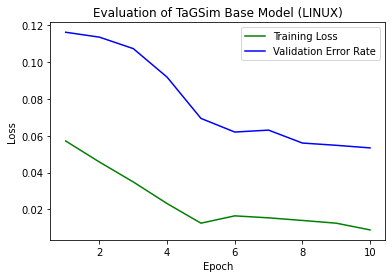


-------Model testing---------.


Model test error: 0.05338216488463721


In [ ]:

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Base Model (' + DATASET + ')'
fit(model,title)

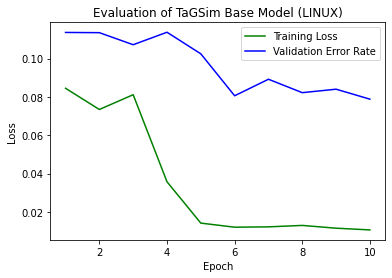


-------Model testing---------.


Model test error: 0.07882352594512676


In [ ]:

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Base Model (' + DATASET + ')'
fit(model,title)

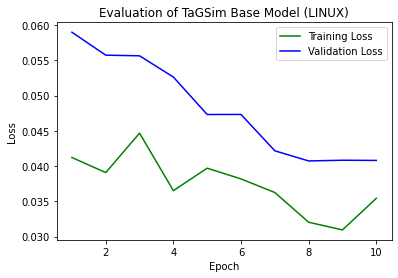


-------Model testing---------.


Model test error: 0.0408023336342012


In [ ]:

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Base Model (' + DATASET + ')'
fit(model,title)

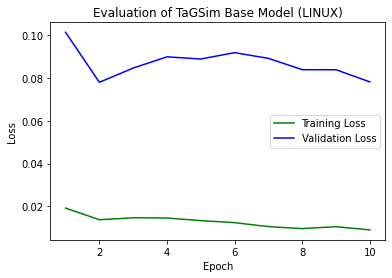


-------Model testing---------.


Model test error: 0.0782245245874427


In [ ]:

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
title='Evaluation of TaGSim Base Model (' + DATASET + ')'
fit(model,title)

#NO ID

In [ ]:


class TaGSim_noID(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim_noID, self).__init__()
        # self.number_of_node_labels = len(number_of_node_labels)
        # self.number_of_edge_labels = len(number_of_edge_labels)
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()



    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 7)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 23)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)
        return hidden1, hidden2

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        
        label_multiset = dict()
        node_features_1, node_features_2= [], []

        for i in graph1.nodes():
            node_features_1.append([1.0])
        for i in graph2.nodes():
            node_features_2.append([1.0])

        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        #label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["features_1"], label_multiset["features_2"] = node_features_1, node_features_2

        # label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
        #     graph1), nx.adjacency_matrix(graph2)
        # label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        # label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        # label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0  ])
        for i in graph2.nodes():
            node_features_2.append([1.0  ])
            

        for i in edges1:
            edge_features_1.append([1.0 ])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0  ])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))


        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        node_features_1,node_features_2=        nx.adjacency_matrix(graph1).todense(), nx.adjacency_matrix(graph2).todense()
        #label_multiset["edge_index_1"], label_multiset["edge_index_2"] = nx.adjacency_matrix(graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_adj_1"], label_multiset["node_adj_2"] =torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))
        
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (sum(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset
    def forward(self, label_multiset):
      adj_1 =  label_multiset["edge_adj_1"]
      adj_2 =  label_multiset["edge_adj_2"] 
      adj_1 =  label_multiset["node_adj_1"]
      adj_2 =  label_multiset["node_adj_2"] 
      features_1, features_2 = label_multiset["features_1"],label_multiset["features_2"]
      edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
      
      edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

              
      graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, features_1)#
      graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, features_2)#
    
      Graph1_hidden1, Graph1_hidden2, Graph2_hidden1, Graph2_hidden2 = [], [], [], []
      for i in range(graph1_hidden1.size()[0]):
        if(graph1_hidden1[i][0] >= 6):# 10 for imdb; 6 for linux # the valus here can be set by the users
            Graph1_hidden1.append([0.0]*5 + [1.0])
        else:
            Graph1_hidden1.append([1.0 if graph1_hidden1[i][0] == j else 0.0 for j in range(6)])

        if(graph1_hidden2[i][0] >= 15):# 50 for imdb; 15 for linux # the valus here can be set by the users
            Graph1_hidden2.append([0.0]*14 + [1.0])
        else:
            Graph1_hidden2.append([1.0 if graph1_hidden2[i][0] == j else 0.0 for j in range(15)])

      for i in range(graph2_hidden1.size()[0]):
          if(graph2_hidden1[i][0] >= 6):# 10 for imdb; 6 for linux # the valus here can be set by the users
              Graph2_hidden1.append([0.0]*5 + [1.0])
          else:
              Graph2_hidden1.append([1.0 if graph2_hidden1[i][0] == j else 0.0 for j in range(6)])

          if(graph2_hidden2[i][0] >= 15):# 50 for imdb; 15 for linux # the valus here can be set by the users
              Graph2_hidden2.append([0.0]*14 + [1.0])
          else:
              Graph2_hidden2.append([1.0 if graph2_hidden2[i][0] == j else 0.0 for j in range(15)])
      Graph1_hidden1, Graph1_hidden2 = torch.FloatTensor(np.array(Graph1_hidden1)), torch.FloatTensor(np.array(Graph1_hidden2))
      Graph2_hidden1, Graph2_hidden2 = torch.FloatTensor(np.array(Graph2_hidden1)), torch.FloatTensor(np.array(Graph2_hidden2))


      edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
      edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge


      graph1_01concat = torch.cat([features_1, Graph1_hidden1], dim=1)
      graph2_01concat = torch.cat([features_2, Graph2_hidden1], dim=1)
      graph1_12concat = torch.cat([Graph1_hidden1, Graph1_hidden2], dim=1)
      graph2_12concat = torch.cat([Graph2_hidden1, Graph2_hidden2], dim=1)

      graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)# default: sum
      graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
      graph1_12pooled = torch.sum(graph1_12concat, dim=0)
      graph2_12pooled = torch.sum(graph2_12concat, dim=0)




      #scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
      #scores_in = torch.t(scores_in)
#
      #scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
      #scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
      #scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
      #score_in = torch.sigmoid(self.scoring_layer_in(scores_in))


        #edge level embedding Concatenation
      edge1_01concat = torch.cat([ edge_features_1, edge1_hidden1], dim=1)
      edge2_01concat = torch.cat([ edge_features_2, edge2_hidden1], dim=1)
      #graph pooling: edge Sum
      edge1_01pooled = torch.sum(edge1_01concat, dim=0)
      edge2_01pooled = torch.sum(edge2_01concat, dim=0)

      graph1_ec_input=torch.cat([ graph1_12pooled, edge1_01pooled]).unsqueeze(1)
      graph2_ec_input=torch.cat([ graph2_12pooled, edge2_01pooled]).unsqueeze(1)
      scores_ec = self.tensor_network_ec(graph1_ec_input, graph2_ec_input)
      scores_ec = torch.t(scores_ec)

      scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
      scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
      score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))
                     #edge insert
      return torch.cat([ score_ec], dim=1)
# test_csv = pd.DataFrame(test_data, columns=['G1', 'G2', 'gt_ged']).to_csv(DATASET_FOLDER + "/testing_pairs.csv",
#                                                                           index=False)
def load_pairs_NID():
    train_pairs = []
    train_csv = pd.read_csv(DATASET_FOLDER+"/training_pairs.csv")
    for index, row in train_csv.iterrows():
        file1 = row['G1']
        file2 = row['G2']
        ged =ast.literal_eval(row['GED'])
        new_ged = [ged[3]]
        graph1 = nx.read_gexf(path=ORI_DIR + '/' + file1)
        graph2 = nx.read_gexf(path=GEN_DIR + '/' + file2)
        gt_ged = row['gt_ged']-abs(graph1.number_of_nodes() -graph2.number_of_nodes())
        train_pairs.append({"graph_pair": [graph1, graph2], "ged": new_ged, "gt_ged":gt_ged})


    test_pairs = []
    test_csv = pd.read_csv(DATASET_FOLDER+"/testing_pairs.csv")
    for index, row in test_csv.iterrows():
        file1 = row['G2']
        file2 = row['G1']
        graph1 = nx.read_gexf(path=TEST_GEN_DIR + '/' + file1)
        graph2 = nx.read_gexf(path=TEST_DIR + '/' + file2)
        gt_ged = row['gt_ged']-abs(graph1.number_of_nodes()- graph2.number_of_nodes())
        test_pairs.append({"graph_pair": [graph1, graph2], "gt_ged": gt_ged})
    return train_pairs, test_pairs
train_pairs_NID, test_pairs_NID = load_pairs_NID()
print(len(train_pairs_NID))
print(train_pairs_NID[0])
print(len(test_pairs_NID))
print(test_pairs_NID[0])

2001
{'graph_pair': [<networkx.classes.graph.Graph object at 0x7f2020f61e50>, <networkx.classes.graph.Graph object at 0x7f2019850dd0>], 'ged': [1], 'gt_ged': 1}
70
{'graph_pair': [<networkx.classes.graph.Graph object at 0x7f20108b0750>, <networkx.classes.graph.Graph object at 0x7f2010754d10>], 'gt_ged': 6.0}



-------Model training---------.

Iteration 0 loss:  0.030458252876996994
Iteration 1 loss:  0.03052743710577488
Iteration 2 loss:  0.032612357288599014
Iteration 3 loss:  0.0325586162507534
Iteration 4 loss:  0.022187378257513046
Iteration 5 loss:  0.026687316596508026
Iteration 6 loss:  0.025267628952860832
Iteration 7 loss:  0.023666605353355408
Iteration 8 loss:  0.023759284988045692
Iteration 9 loss:  0.019950170069932938
Iteration 10 loss:  0.01729407347738743
Iteration 11 loss:  0.019870774820446968
Iteration 12 loss:  0.020656879991292953
Iteration 13 loss:  0.020519426092505455
Iteration 14 loss:  0.01914665475487709
Iteration 15 loss:  0.02081053345291703
Iteration 16 loss:  0.021322883665561676
Iteration 17 loss:  0.019183212891221046
Iteration 18 loss:  0.018649110570549965
Iteration 19 loss:  0.016897937282919884
Iteration 20 loss:  0.015739891678094864
Iteration 21 loss:  0.016624564304947853
Iteration 22 loss:  0.013753634877502918
Iteration 23 loss:  0.01571573689579963

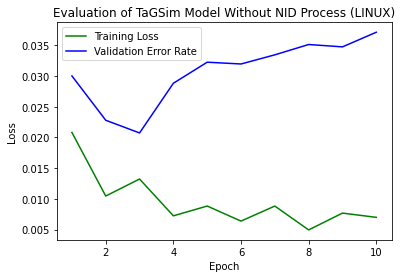


-------Model testing---------.


Model test error: 0.03712418522378097


In [ ]:

import matplotlib.pyplot as plt

epochs = 10
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim_noID(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []
#model training
for epoch in range(epochs):
  
    random.shuffle(train_pairs_NID)
    batches = []
    for graph in range(0, len(train_pairs_NID), batch_size):
        batches.append(train_pairs_NID[graph:graph + batch_size])
    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))


    # testing
    model.eval()
    test_scores=[]
    for n in test_pairs_NID:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)


#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
plt.title('Evaluation of TaGSim Model Without NID Process (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs_NID:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    prediction = torch.sum(prediction).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))


-------Model training---------.



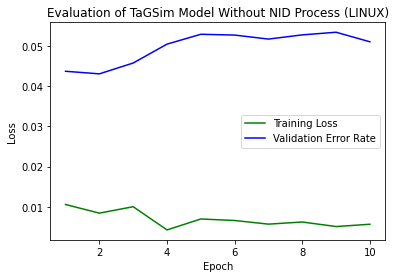


-------Model testing---------.


Model test error: 0.051101189495135


In [ ]:

import matplotlib.pyplot as plt

epochs = 10
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim_noID(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []
#model training
for epoch in range(epochs):
  
    random.shuffle(train_pairs_NID)
    batches = []
    for graph in range(0, len(train_pairs_NID), batch_size):
        batches.append(train_pairs_NID[graph:graph + batch_size])
    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        iteration += 1

    visual_loss_train.append(loss / len(batch))


    # testing
    model.eval()
    test_scores=[]
    for n in test_pairs_NID:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)


#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
plt.title('Evaluation of TaGSim Model Without NID Process (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs_NID:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    prediction = torch.sum(prediction).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))


-------Model training---------.



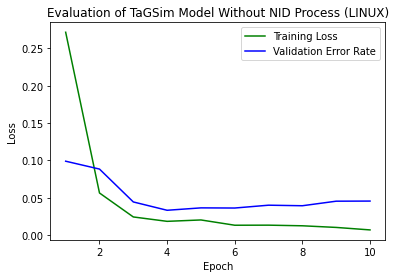


-------Model testing---------.


Model test error: 0.04547745154637336


In [ ]:

import matplotlib.pyplot as plt

epochs = 10
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim_noID(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []
#model training
for epoch in range(epochs):
  
    random.shuffle(train_pairs_NID)
    batches = []
    for graph in range(0, len(train_pairs_NID), batch_size):
        batches.append(train_pairs_NID[graph:graph + batch_size])
    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        iteration += 1

    visual_loss_train.append(loss / len(batch))


    # testing
    model.eval()
    test_scores=[]
    for n in test_pairs_NID:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)


#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Error Rate')
plt.title('Evaluation of TaGSim Model Without NID Process (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs_NID:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    prediction = torch.sum(prediction).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))